In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import copy

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%load_ext autoreload
%autoreload 2

sys.path.append( r"c:\Users\emeraldgeomodelling\Software\ga-aem-emrld\python" )
from gaaem_utils import *

In [4]:
data_dir=r"c:\Users\emeraldgeomodelling\Software\ga-aem-emrld\examples\bhmar-skytem\galeisbstdem\output_nompi_parallel"

In [5]:
model=read_GALEI_files(data_dir)

Reading files:['c:\\Users\\emeraldgeomodelling\\Software\\ga-aem-emrld\\examples\\bhmar-skytem\\galeisbstdem\\output_nompi_parallel\\inversion.output.0000.asc', 'c:\\Users\\emeraldgeomodelling\\Software\\ga-aem-emrld\\examples\\bhmar-skytem\\galeisbstdem\\output_nompi_parallel\\inversion.output.0001.asc', 'c:\\Users\\emeraldgeomodelling\\Software\\ga-aem-emrld\\examples\\bhmar-skytem\\galeisbstdem\\output_nompi_parallel\\inversion.output.0002.asc', 'c:\\Users\\emeraldgeomodelling\\Software\\ga-aem-emrld\\examples\\bhmar-skytem\\galeisbstdem\\output_nompi_parallel\\inversion.output.0003.asc']


In [6]:
for c in model["flightlines"].columns:
    print("{0} : {1}".format(c, model["flightlines"].loc[0:3,c].values ))

uniqueid : [0 1 2 3]
survey : [1216 1216 1216 1216]
date : [20090803 20090803 20090803 20090803]
flight : [20090803 20090803 20090803 20090803]
line : [24000 24000 24000 24000]
fiducial : [1261433. 1261437. 1261441. 1261445.]
easting : [603036.5 603042.8 603049.5 603056.2]
northing : [6413475.5 6413470.2 6413464.5 6413458.4]
elevation : [68.63 68.64 68.64 68.65]
tx_height : [27.7 28.4 29.1 29.9]
tx_roll : [-0.17  1.71  4.28  6.75]
tx_pitch : [-11.86 -11.5  -11.07 -10.6 ]
tx_yaw : [0. 0. 0. 0.]
txrx_dx : [-12.79 -12.8  -12.8  -12.8 ]
txrx_dy : [ 0.01 -0.06 -0.16 -0.25]
txrx_dz : [-0.48 -0.4  -0.31 -0.21]
rx_roll : [-0.17  1.71  4.28  6.75]
rx_pitch : [-11.86 -11.5  -11.07 -10.6 ]
rx_yaw : [0. 0. 0. 0.]
nlayers : [30 30 30 30]
AlphaC : [1. 1. 1. 1.]
AlphaT : [0. 0. 0. 0.]
AlphaG : [1. 1. 1. 1.]
AlphaS : [333. 333. 333. 333.]
PhiD : [1.011277  1.055976  0.9815471 0.9785103]
PhiM : [0.2595485 0.2590751 0.2612786 0.2616167]
PhiC : [0.2270203 0.226692  0.228767  0.229396 ]
PhiT : [0. 0. 0. 0

In [7]:
make_XYZ_model(model)

In [8]:
for c in model["flightlines"].columns:
    print("{0} : {1}".format(c, model["flightlines"].loc[0:3,c].values ))

uniqueid : [0 1 2 3]
survey : [1216 1216 1216 1216]
date : [20090803 20090803 20090803 20090803]
flight : [20090803 20090803 20090803 20090803]
line : [24000 24000 24000 24000]
fiducial : [1261433. 1261437. 1261441. 1261445.]
easting : [603036.5 603042.8 603049.5 603056.2]
northing : [6413475.5 6413470.2 6413464.5 6413458.4]
elevation : [68.63 68.64 68.64 68.65]
tx_height : [27.7 28.4 29.1 29.9]
tx_roll : [-0.17  1.71  4.28  6.75]
tx_pitch : [-11.86 -11.5  -11.07 -10.6 ]
tx_yaw : [0. 0. 0. 0.]
txrx_dx : [-12.79 -12.8  -12.8  -12.8 ]
txrx_dy : [ 0.01 -0.06 -0.16 -0.25]
txrx_dz : [-0.48 -0.4  -0.31 -0.21]
rx_roll : [-0.17  1.71  4.28  6.75]
rx_pitch : [-11.86 -11.5  -11.07 -10.6 ]
rx_yaw : [0. 0. 0. 0.]
nlayers : [30 30 30 30]
AlphaC : [1. 1. 1. 1.]
AlphaT : [0. 0. 0. 0.]
AlphaG : [1. 1. 1. 1.]
AlphaS : [333. 333. 333. 333.]
PhiD : [1.011277  1.055976  0.9815471 0.9785103]
PhiM : [0.2595485 0.2590751 0.2612786 0.2616167]
PhiC : [0.2270203 0.226692  0.228767  0.229396 ]
PhiT : [0. 0. 0. 0

<IPython.core.display.Javascript object>


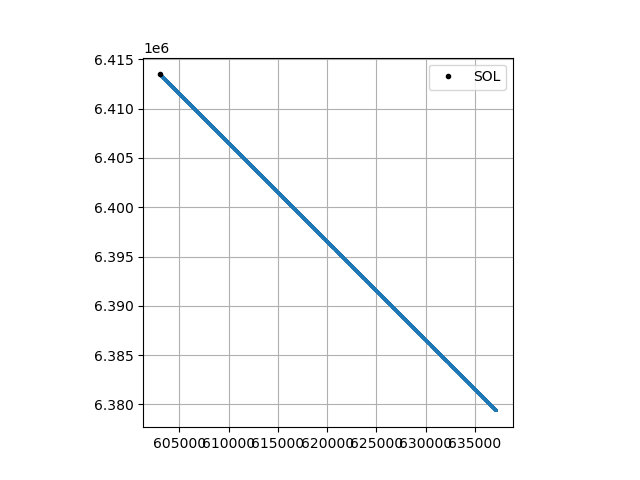

In [14]:
fig, ax = plt.subplots()
ax.plot(model["flightlines"].easting, model["flightlines"].northing, ".-", ms=2)
ax.plot(model["flightlines"].easting.iloc[0], model["flightlines"].northing.iloc[0], "k.", label="SOL")
ax.set_aspect("equal")
ax.legend()
ax.grid()

<IPython.core.display.Javascript object>


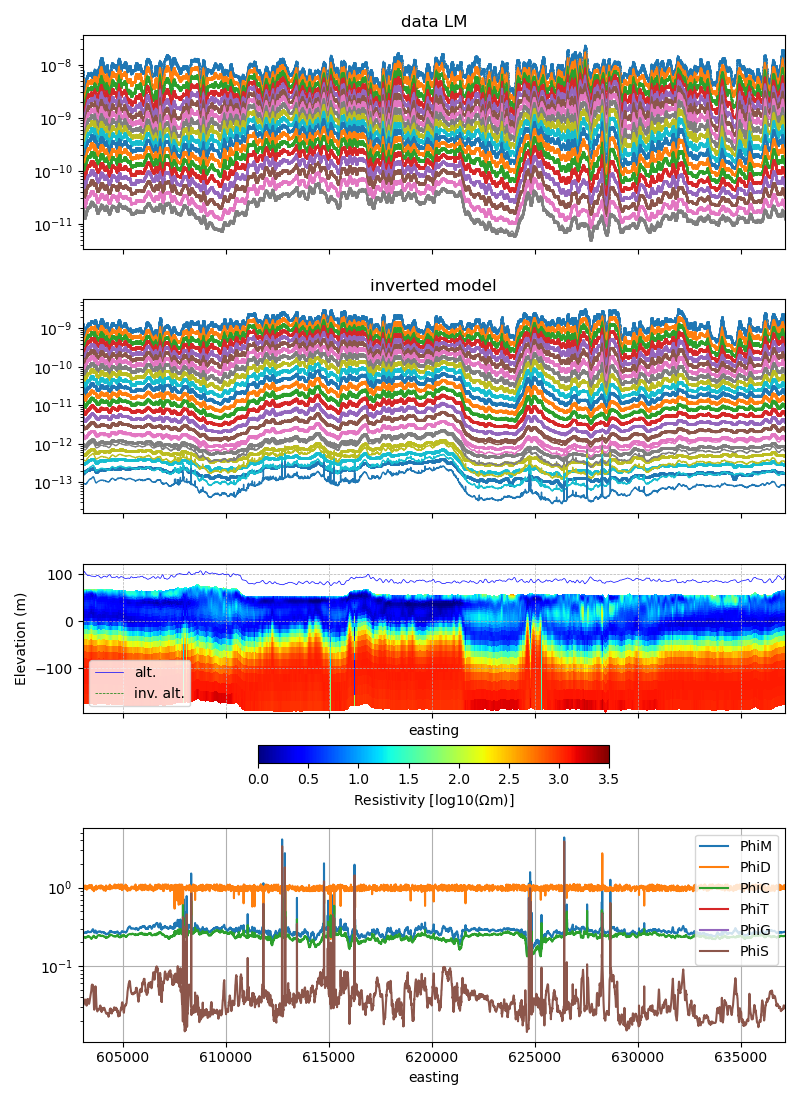

In [15]:
fig, ax = GALEI_invQCplot(model, keyx="easting")